In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
#import warnings
#warnings.simplefilter("ignore")

In [ ]:
df=pd.read_csv("/content/Language Detection.csv")

In [ ]:
X = df["Text"]
y = df["Language"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [ ]:
# creation of feature extractor for text data
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray() # to learn the vocabulary dictionary and extract the term frequency matrix
print(X.shape)

(10337, 34937)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
# multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test) #predicting the model with x_test data

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Accuracy :",accuracy)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       143
           1       0.99      0.95      0.97        93
           2       0.96      0.96      0.96       106
           3       0.91      1.00      0.95       273
           4       0.98      0.99      0.99       197
           5       1.00      0.96      0.98        97
           6       1.00      0.99      0.99        72
           7       1.00      1.00      1.00        13
           8       0.98      0.98      0.98       131
           9       1.00      0.95      0.97        79
          10       1.00      0.99      1.00       117
          11       0.98      0.97      0.98       153
          12       1.00      0.97      0.99       117
          13       0.97      0.97      0.97       154
          14       0.98      0.97      0.97       127
          15       1.00      1.00      1.00       102
          16       1.00      0.94      0.97        94

    accuracy              

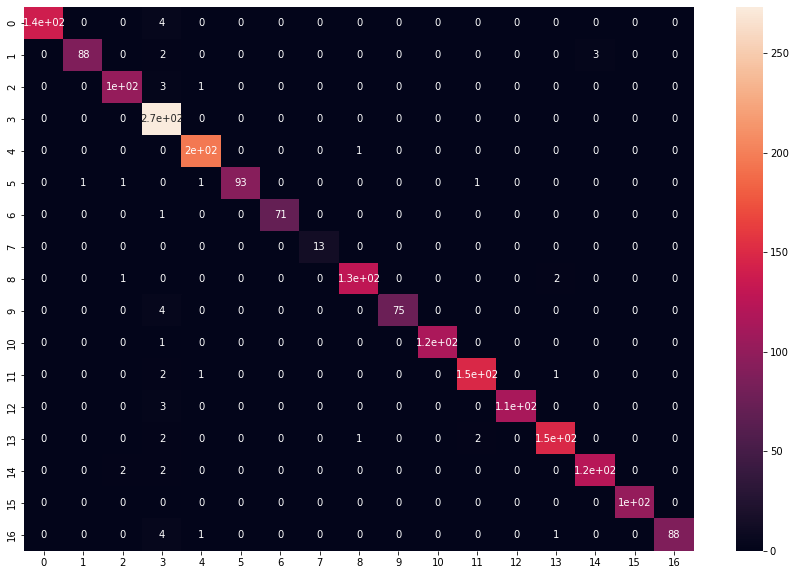

In [ ]:
#heat map
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
def predict_lang(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("Language : ",lang[0]) # printing the language

In [ ]:
df["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
# Malayalam
predict_lang("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")

Language :  Malayalam


In [ ]:
predict_lang("வணக்கம்") #tamil

Language :  Tamil


In [ ]:
predict_lang("je t'aime") #French

Language :  French


In [ ]:
predict_lang("ich vermisse diche") #german

Language :  German


In [ ]:
predict_lang("مرحبا.. كيف حالك؟")

Language :  Arabic


In [ ]:
predict_lang("io ho molto fame!")

Language :  Italian


In [ ]:
predict_lang("گزشتہ ایک روز کے دوران کورونا کے سبب 118 اموات ہوئیں جس کے بعد اموات کا مجموعہ")

Language :  Arabic
